# Фракталы Ньютона

In [10]:
import scipy.misc as smp
import numpy as np
from cmath import sqrt

Размер картинки в пикселях и точность вычисления корня:

In [11]:
Epsilon = 10 ** ( - 2 )

LinearSize = 1024

Функция и ее производная:

In [12]:
def f ( z ) :
    
    Function = z ** 3 - 1
    
    return Function

def Df ( z ):
    
    Derivative = 3 * z ** 2
    
    return Derivative

Нахождение корня на комплексной плоскости методом Ньютона:

In [13]:
def FindRoot ( z0 ):
    
    ZSaved = z0 + 10*Epsilon + 10*Epsilon*sqrt(-1) #добавка зависит от эпсилон, чтобы можно было брать произвольную,даже очень грубую точность
    
    while abs (np.real ( ZSaved - z0 ) )> Epsilon or abs (np.imag ( ZSaved - z0 ) )> Epsilon :
       
        ZSaved = z0
        
        if z0 != 0 :  # проверка деления на ноль
            
            z0 = ZSaved - f ( ZSaved ) / Df ( ZSaved )
            
    return z0

Собственно, функция создания пиксельного массива фрактала:

In [14]:
def Drawing ( W ) :
    
    Image = np.zeros ( ( W , W , 3 ) , dtype = np.uint8 ) # объявление массива
    
    for i in range ( -  W // 2, W // 2 ):
        
        for j in range ( - W // 2, W // 2 ):
  
            z0 = i + j * sqrt ( - 1 ) #каждому пикселю соответствует комплексное число
            
            ArrayX = i + W // 2 #сдвиг, т.к. индексация массива начинается с нуля
            ArrayY = j + W // 2
         
        
            if np.imag ( FindRoot ( z0 ) ) // 0.01 == 0 :  #Деление по модулю необходимо ввиду возникающей ошибки на вычисление
                                                           #мнимой части. Она может оказаться отрицательной, там, где на самом
                Image [ ArrayX , ArrayY ] = [ 255, 0 , 0]  #деле равна нулю из - за точности вычислений.
                
            elif np.imag ( FindRoot ( z0 ) ) // 0.01 > 0:
            
                Image [ ArrayX , ArrayY ] = [ 0, 255 , 0]
              
            else :
            
                Image [ ArrayX , ArrayY ] = [ 255, 255 , 0]
             
            
    return Image

In [15]:
Fractal = Drawing ( LinearSize )

Преобразование массива в изображение и вывод:

In [17]:
img = smp.toimage( Fractal )
img.show()

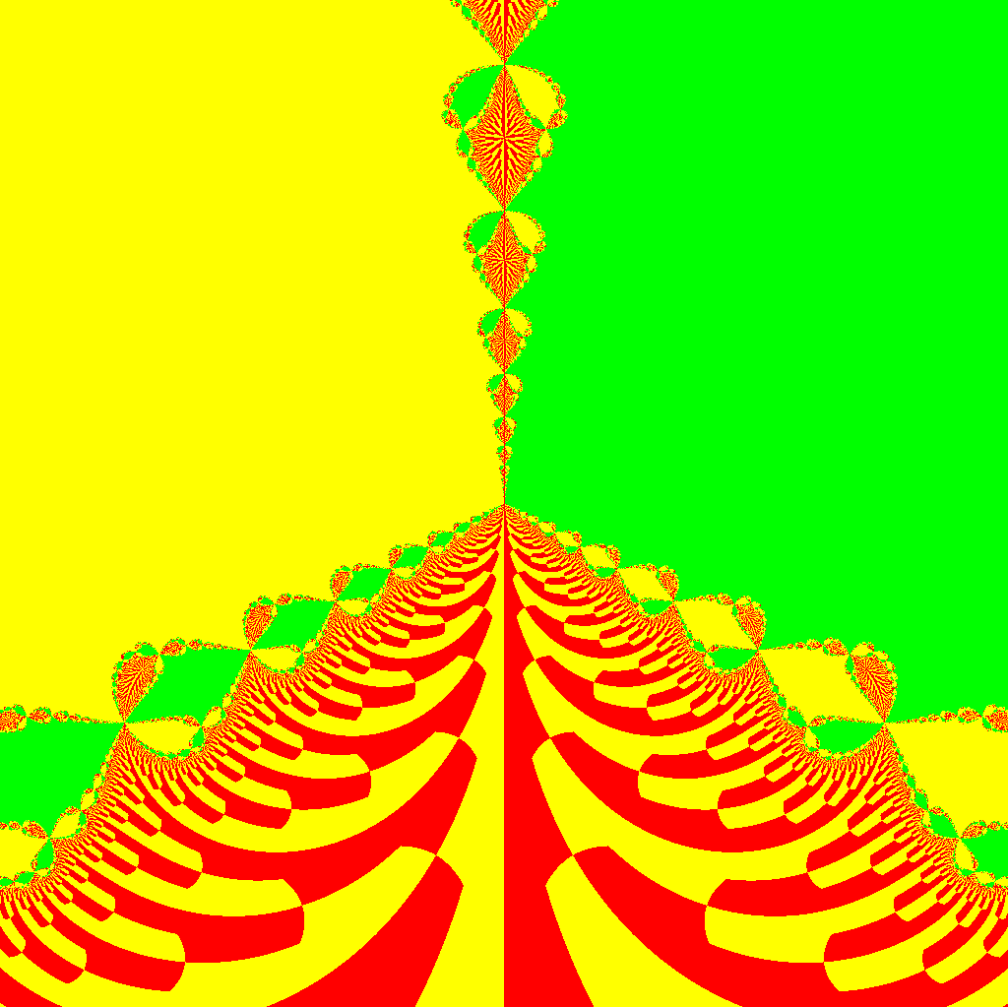